# Exam 8

## Scenario
A Bank institution manages data ot two types of accounts; *basic customers* and *trading
customers*.<br>
Both types have an *identifier* (e.g., the account number) and a *balance* (amount of
available money). In addition, trading customers have a *portfolio* of owned stocks and quantity
*(e.g., I(SPM, 200), (META, 100), . . )* and a variable *totalWealth* that summarises the balance
with the values of the stocks.<br>
How the value of totalWealth is updated is described later.

**1. Design the data structures to represent the Bank, the Basic Customers and the Trading Customers.**

In [1]:
class Bank():
    def __init__(self, bank_name):
        self.name = bank_name
        self.basic_customers = []
        self.trading_customers = []
        
    def new_basic_customer(self, new_customer):
        if new_customer not in self.basic_customers:
            self.basic_customers.append(new_customer)
        else:
            raise Exception('Already-existing basic customer')
            
    def new_trading_customer(self, new_customer):
        if new_customer not in self.trading_customers:
            self.trading_customers.append(new_customer)
        else:
            raise Exception('Already-existing trading customer')

class BasicCustomer:
    def __init__(self, identifier, balance, bank):
        self.id = identifier
        self.balance = balance
        self.bank = bank
        self.bank.new_basic_customer(self)

class TradingCustomer:
    def __init__(self, identifier, balance, bank, portfolio, totalWealth):
        self.id = identifier
        self.balance = balance
        self.bank = bank
        self.portfolio = portfolio
        self.totalWealth = totalWealth
        self.bank.new_trading_customer(self)


In [2]:
# testing the code
bank1 = Bank('UniCredit')
c1 = BasicCustomer('Ale', 500, bank1)
c2 = TradingCustomer('Lori', 100, bank1, [('SPM', 200), ('META', 100)], None)
print(*[c.id for c in bank1.basic_customers])
print(*[c.id for c in bank1.trading_customers])

Ale
Lori


In [3]:
### generating random customers to test the code ###
import random
import string

ids = []

# 500 basic customers
for n in range(500):
    cid = ''.join(random.choices(string.ascii_letters + string.digits, k = 5))
    while cid in ids:
        cid = ''.join(random.choices(string.ascii_letters + string.digits, k = 5))
    ids.append(cid)
    globals()['c%s' % n] = BasicCustomer(cid, random.randint(0, 10000000), bank1)
    
# example list of stock names
stocks = ['ADNWW', 'AIMDW', 'AMH', 'AQNA', 'ATCOL', 'AY', 'BFI', 'BLU', 'BRY', 'CAMT', 'CERS', 'CLBR', 'COE', 'CSCO', 'CYTO', 'DKDCW', 'DWACW', 'ELME', 'ESP', 'FBRX', 'FMC', 'FTF', 'GET', 'GNTX', 'GWRE', 'HMACU', 'HWCPZ', 'IMBIL', 'IRDM', 'JNCE', 'KOF', 'LEGA', 'LOV', 'MBCN', 'MGY', 'MPAA', 'MYD', 'NHI', 'NSTS', 'OCAXU', 'ORIAU', 'PCH', 'PII', 'PRCT', 'PYT', 'RELI', 'ROCG', 'SANW', 'SFST', 'SLNG', 'SPNS', 'SUM', 'TCVA', 'TMCWW', 'TTP', 'USAP', 'VIRX', 'WRK', 'ZBRA']

# 500 trading customers
for n in range(500, 1000):
    cid = ''.join(random.choices(string.ascii_letters + string.digits, k = 5))
    while cid in ids:
        cid = ''.join(random.choices(string.ascii_letters + string.digits, k = 5))
    ids.append(cid)
    balance = random.randint(0, 10000000)
    number_of_stocks_owned = random.randint(1, 10)
    customer_stocks = [[stock_name, random.randint(0, 100)] for stock_name in random.choices(stocks, k = number_of_stocks_owned)]
    globals()['c%s' % n] = TradingCustomer(cid, balance, bank1, customer_stocks, balance + random.randint(0, 1000))

**2. Design a function `make_transaction(customer_10_1, customer_1d_2, amount)`
that:**
* Attempts to move amount of money trom the balance of `customer_id_1` to the balance of `customer_id_2`
* If the balance of `customerid_1` is lower than amount, then the transaction is aborted and a `BalanceException` is raised (also define the exception)
* If the transaction is completed successfully, the function appends to a `log.csv` file a line of text with its parameters: `customer_id_1, customer_id_2, amount`

In [4]:
class BalanceException(Exception):
    def __init__(self, msg):
        self.msg = msg

def make_transaction(cus1, cus2, amount):
    if cus1.balance > amount:
        cus1.balance -= amount
        cus2.balance += amount
    else:
        raise BalanceException('Not enough money to be transfered')
    with open('log.csv', 'a') as af:
        af.write(f'\n{cus1.id}, {cus2.id}, {amount}')

In [5]:
make_transaction(c2, c1, 50)
make_transaction(c1, c2, 200)

**3. Once a day, a financial institute provides a file `quotations.csv` that lists all the stocks with the
dallyprice**: <br>
`AMD, 113.18`<br>`AAPL, 168.64`<br>`TWTR, 35.84`<br>
Create a function (or a set of tunctions) that reads and parses the file, and updates the
totalWealth of each TradingCustomer as follows:<br>
totalWealth = balance + ∑ (price_of_stock * quantity_of_stock)

In [6]:
## creating the quotations file with random quotations for each stock ##
with open('quotations.csv', 'w') as q:
    for stock in stocks:
        q.write(f'{stock}, {round(random.randint(0, 100) + random.random(), 2)}\n')

In [7]:
def update_wealth(bank):
    quotations = {}
    with open('quotations.csv', 'r') as qf:
        for line in qf.readlines():
            line = line.strip().split(', ')
            quotations[line[0]] = float(line[1])
    for trad_cus in bank.trading_customers:
        trad_cus.totalWealth = trad_cus.balance + sum([stock[1] * quotations[k]
                                                         for stock in trad_cus.portfolio
                                                          for k, v in quotations.items()
                                                               if k == stock[0]])

In [8]:
update_wealth(bank1)
# totalWealth of first 10 customers
for c in bank1.trading_customers[:10]:
    print(f'Trading Customer {c.id}\ttotalWealth: {c.totalWealth:.2f}')

Trading Customer Lori	totalWealth: 100.00
Trading Customer L9pyE	totalWealth: 5076365.59
Trading Customer IknMw	totalWealth: 2070190.55
Trading Customer RPd8I	totalWealth: 8282569.77
Trading Customer xwO8d	totalWealth: 9631676.78
Trading Customer VuiaB	totalWealth: 836742.77
Trading Customer 6Pxs7	totalWealth: 2245008.65
Trading Customer iAWKp	totalWealth: 1698035.71
Trading Customer ajwT5	totalWealth: 5782312.14
Trading Customer HdRYt	totalWealth: 558365.04


**4. Implement a piece of software that returns the list of the ids of the 10% Basic Customers with the highest balance.**

In [9]:
def highest_basic_customers(bank):
    d = {}
    for basic_customer in bank.basic_customers:
        d[basic_customer.id] = basic_customer.balance
    balances = []
    for k, v in d.items():
        balances.append(v)
    balances = sorted(balances, reverse = True)
    for balance in balances[:len(balances)//10]:
        for k, v in d.items():
            if v == balance:
                print(f'Customer: {k}\t\tBalance: {v:.2f}')

highest_basic_customers(bank1) # should return 50 elements if we have 500 basic customers

Customer: q7jlT		Balance: 9947508.00
Customer: BVu7m		Balance: 9939041.00
Customer: Cv6Rb		Balance: 9870631.00
Customer: bQGIS		Balance: 9840789.00
Customer: Ag4ap		Balance: 9839935.00
Customer: DSLws		Balance: 9812487.00
Customer: WChr7		Balance: 9804161.00
Customer: Oxw62		Balance: 9775677.00
Customer: 1tJ2j		Balance: 9747244.00
Customer: j65ih		Balance: 9746931.00
Customer: T0avC		Balance: 9743145.00
Customer: qpePc		Balance: 9703488.00
Customer: 5TVJK		Balance: 9649705.00
Customer: rX8dY		Balance: 9644341.00
Customer: AVFb6		Balance: 9642795.00
Customer: IsLWi		Balance: 9641062.00
Customer: pno0L		Balance: 9608509.00
Customer: HEHo1		Balance: 9607902.00
Customer: CoGzx		Balance: 9586988.00
Customer: hRvHE		Balance: 9579682.00
Customer: itAE4		Balance: 9564130.00
Customer: rwjfb		Balance: 9530682.00
Customer: sXkYu		Balance: 9527302.00
Customer: WyL3I		Balance: 9523264.00
Customer: P9tkO		Balance: 9502774.00
Customer: 9hMtP		Balance: 9448309.00
Customer: DCbZi		Balance: 9448225.00
C

**5. Implement a piece of software that identifies the stock that is owned by the maximum number of Trading Customers.**

In [10]:
stock_owners = {}
for c in bank1.trading_customers:
    for stock in c.portfolio:
        if stock[0] not in stock_owners:
            stock_owners[stock[0]] = 1
        else:
            stock_owners[stock[0]] += 1
max_num = 0
for k, v in stock_owners.items():
    if v > max_num:
        max_num = v

for k, v in stock_owners.items():
    if v == max_num:
        most_owned_stock = k
        print(f'Stock {k} owned by {v} customers')

Stock ESP owned by 61 customers


**6. Implement a function `quantity_boxplot(stock)` that:**
* Identifies the customers that own the `stock`;
* From each of those customers extracts the quantity of the stock;
* Plots a boxplot of the distribution of the quantity.

In [11]:
import matplotlib.pyplot as plt

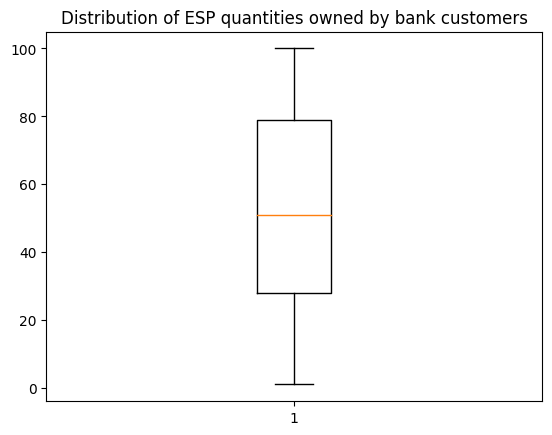

In [12]:
def quantity_boxplot(stock):
    ### with a for loop ###
    #for c in bank1.trading_customers:
    #    for s in c.portfolio:
    #        if s[0] == stock:
    #            lst.append(s[1])
    ### or with a list comprehension ###
    quantities = [s[1] for c in bank1.trading_customers for s in c.portfolio if s[0] == stock]
    plt.boxplot(quantities)
    plt.title(f'Distribution of {stock} quantities owned by bank customers')

quantity_boxplot(most_owned_stock)
